In [213]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import graphviz

# Data PreProcessing

In [214]:
iris = load_iris()

In [215]:
type(iris)

sklearn.utils._bunch.Bunch

In [216]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [217]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [218]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [219]:
iris_df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])

In [220]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [221]:
iris_df['Iris type'] = iris['target']

In [222]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [223]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [224]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [225]:
iris_df.shape

(150, 5)

In [226]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Iris type'],
      dtype='object')

In [227]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Iris type            0
dtype: int64

In [228]:
iris_df.duplicated().sum()

1

In [229]:
iris_df = iris_df.drop_duplicates()

In [230]:
iris_df.duplicated().sum()

0

In [231]:
iris_df = iris_df.rename(columns={"sepal length (cm)": "sepal length","sepal width (cm)": "sepal width"
                                  ,"petal length (cm)": "petal length","petal width (cm)": "petal width"})

iris_df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Iris type'],
      dtype='object')

In [232]:
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

#  Data Visualization

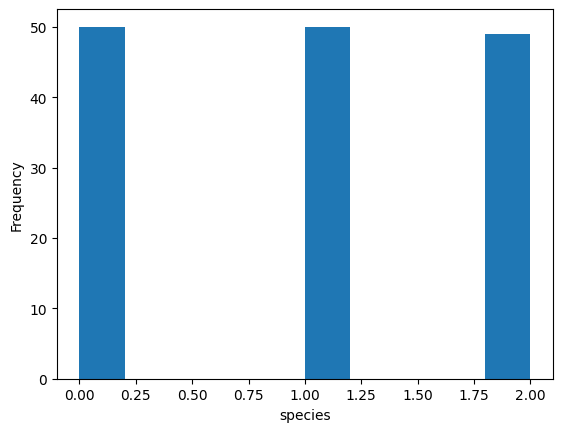

In [233]:
plt.hist(iris_df['Iris type'])
plt.xlabel('species')
plt.ylabel('Frequency')
plt.show()

In [234]:
correlation_matrix=iris_df.corr(numeric_only=True)
print(correlation_matrix)

              sepal length  sepal width  petal length  petal width  Iris type
sepal length      1.000000    -0.118129      0.873738     0.820620   0.786971
sepal width      -0.118129     1.000000     -0.426028    -0.362894  -0.422987
petal length      0.873738    -0.426028      1.000000     0.962772   0.949402
petal width       0.820620    -0.362894      0.962772     1.000000   0.956514
Iris type         0.786971    -0.422987      0.949402     0.956514   1.000000


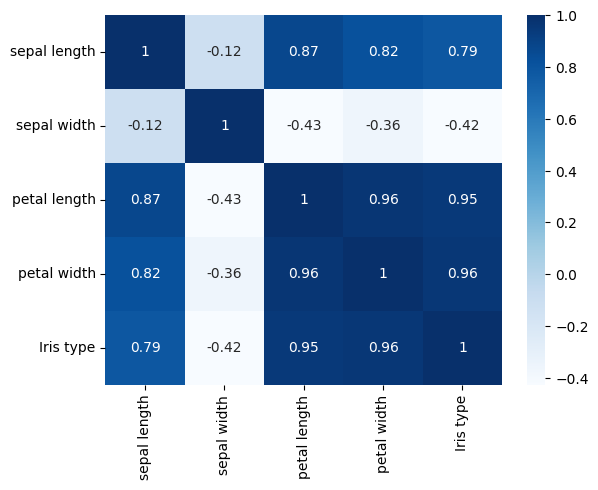

In [235]:
sns.heatmap(correlation_matrix,annot=True, cmap='Blues')
plt.show()

c:\Users\yeswa\Envs\test\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



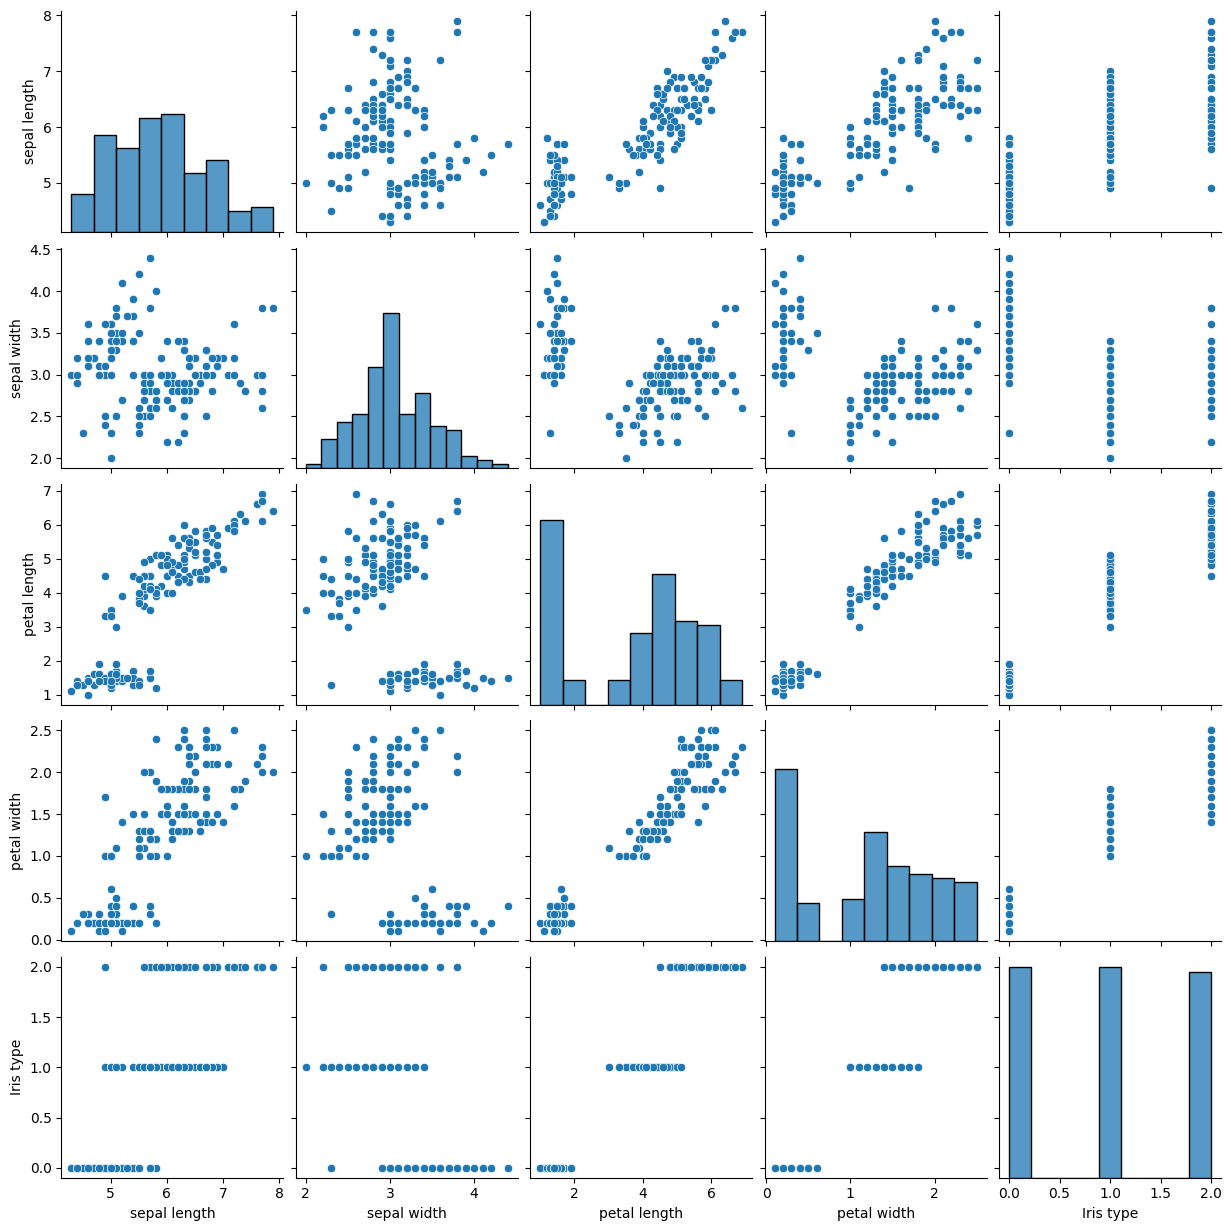

In [236]:
sns.pairplot(iris_df)
plt.show()

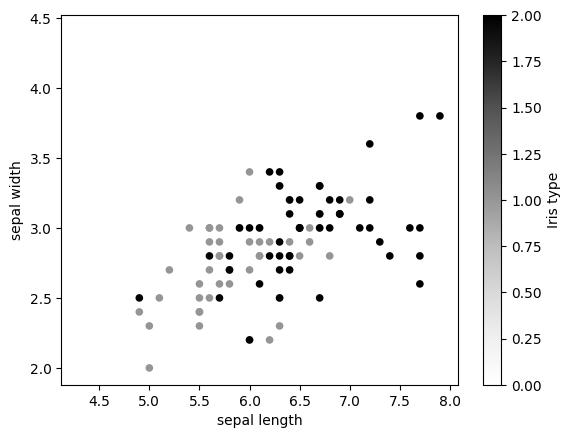

In [237]:
ax2 = iris_df.plot.scatter(x='sepal length',y='sepal width',c='Iris type')

array([[<Axes: title={'center': 'petal length'}, xlabel='[Iris type]'>,
        <Axes: title={'center': 'petal width'}, xlabel='[Iris type]'>],
       [<Axes: title={'center': 'sepal length'}, xlabel='[Iris type]'>,
        <Axes: title={'center': 'sepal width'}, xlabel='[Iris type]'>]],
      dtype=object)

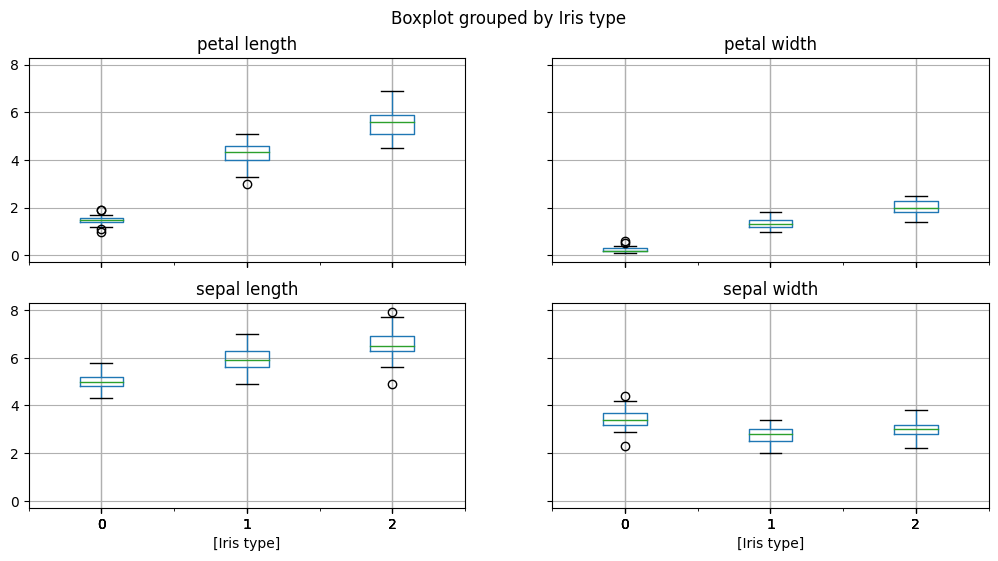

In [238]:
iris_df.boxplot(by="Iris type", figsize=(12, 6))

# Spliting into Test and Train

In [239]:
X 

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [240]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Iris type, Length: 149, dtype: int32

In [241]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [242]:
X_train

,sepal length,sepal width,petal length,petal width
9,4.9,3.1,1.5,0.1
59,5.2,2.7,3.9,1.4
16,5.4,3.9,1.3,0.4
122,7.7,2.8,6.7,2.0
7,5.0,3.4,1.5,0.2
...,...,...,...,...
39,5.1,3.4,1.5,0.2
91,6.1,3.0,4.6,1.4
31,5.4,3.4,1.5,0.4
40,5.0,3.5,1.3,0.3


In [243]:
X_test.head()

,sepal length,sepal width,petal length,petal width
138,6.0,3.0,4.8,1.8
125,7.2,3.2,6.0,1.8
67,5.8,2.7,4.1,1.0
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0


In [244]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 4)
(30, 4)
(119,)
(30,)


# Implementation  of ID3 Algorithm

In [245]:
model_ID3 = DecisionTreeClassifier()

In [246]:
model_ID3.fit(X_train,y_train)

DecisionTreeClassifier()

In [247]:
y_pred = model_ID3.predict(X_test)

In [248]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted Value': y_pred})
print(df_pred)

     Actual  Predicted Value
138       2                1
125       2                2
67        1                1
3         0                0
113       2                2
52        1                1
18        0                0
136       2                2
20        0                0
64        1                1
73        1                1
30        0                0
102       2                2
19        0                0
10        0                0
132       2                2
51        1                1
63        1                1
134       2                2
28        0                0
115       2                2
45        0                0
46        0                0
2         0                0
139       2                2
17        0                0
44        0                0
126       2                1
75        1                1
69        1                1


In [249]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', con_matrix)

Confusion matrix

 [[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]


In [250]:
print("ID3 Metric - IRIS dataset :")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

ID3 Metric - IRIS dataset :
Accuracy: 0.9333333333333333
Precision: 0.9466666666666667
Recall: 0.9333333333333333
F1 Score: 0.9333333333333333


**Results** 
We have 3 different classifications our data can be placed into. This confusion matrix is telling us that the model predicted:

*Setosa* (type 1) => Samples: 12, Correctly classified: 13


*Versicolor* (type 2) => Samples: 8, Correctly classified: 8.


*Virginica* (type 3) => Samples: 10, Correctly classified: 8, 2 sample was incorrectly classified as type 2.

# Implementation  of CART Algorithm

In [251]:
model_Cart = DecisionTreeClassifier(criterion = 'gini')

In [252]:
model_Cart.fit(X_train,y_train)

DecisionTreeClassifier()

In [253]:
y_cart_pred = model_Cart.predict(X_test)

In [254]:
df_pred1=pd.DataFrame({'Actual':y_test,'Predicted Value': y_cart_pred})
print(df_pred1)

     Actual  Predicted Value
138       2                1
125       2                2
67        1                1
3         0                0
113       2                2
52        1                1
18        0                0
136       2                2
20        0                0
64        1                1
73        1                1
30        0                0
102       2                2
19        0                0
10        0                0
132       2                2
51        1                1
63        1                1
134       2                1
28        0                0
115       2                2
45        0                0
46        0                0
2         0                0
139       2                2
17        0                0
44        0                0
126       2                1
75        1                1
69        1                1


In [255]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_cart_pred)
print('Confusion matrix\n\n', con_matrix)

Confusion matrix

 [[12  0  0]
 [ 0  8  0]
 [ 0  3  7]]


**Results** 
We have 3 different classifications our data can be placed into. This confusion matrix is telling us that the model predicted:

*Setosa* (type 1) => Samples: 12, Correctly classified: 12


*Versicolor* (type 2) => Samples: 8, Correctly classified: 7. 1 sample was incorrectly classified as type 3.


*Virginica* (type 3) => Samples: 10, Correctly classified: 7, 2 sample was incorrectly classified as type 2.

# Performance Evaluation

In [256]:
print("CART Metrics - Iris Dataset :")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_cart_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_cart_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_cart_pred, average='weighted'))

CART Metrics - Iris Dataset :
Accuracy: 0.9333333333333333
Precision: 0.9272727272727274
Recall: 0.9
F1 Score: 0.8990712074303405


# Implementing for the Wine and Breast Cancer Datasetṣ

In [257]:
from sklearn.datasets import load_wine, load_breast_cancer

wine_df = load_wine()

breast_cancer_df = load_breast_cancer()


In [258]:
wine_X = wine_df.data
wine_y = wine_df.target

breast_cancer_X = breast_cancer_df.data
breast_cancer_y = breast_cancer_df.target


In [259]:
wine_df = pd.DataFrame(data = wine_df['data'], columns = wine_df['feature_names'])

In [260]:
breast_cancer_df = pd.DataFrame(data = breast_cancer_df['data'], columns = breast_cancer_df['feature_names'])

In [261]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [262]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Handle missing values (if any)** 

In [263]:
wine_df.dropna(inplace=True)
breast_cancer_df.dropna(inplace=True)

In [264]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [265]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [266]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [267]:
breast_cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [268]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [269]:
breast_cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## Data Visualization:

In [270]:
wine_df = pd.DataFrame(data=wine_X, columns=wine_data.feature_names)
wine_df['target'] = wine_y

In [271]:
breast_cancer_df = pd.DataFrame(data=breast_cancer_X, columns=breast_cancer_data.feature_names)
breast_cancer_df['target'] = breast_cancer_y

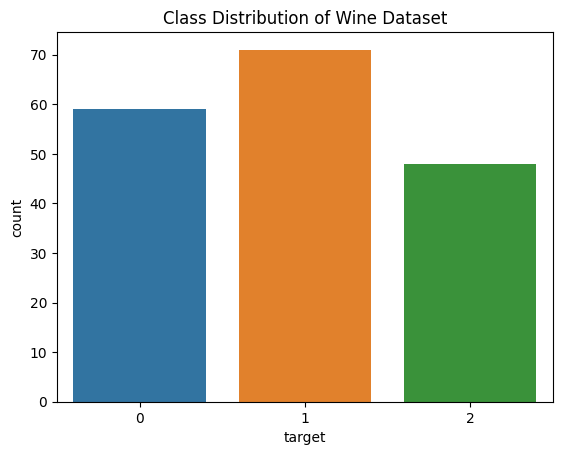

In [272]:
sns.countplot(x='target', data=wine_df)
plt.title('Class Distribution of Wine Dataset')
plt.show()

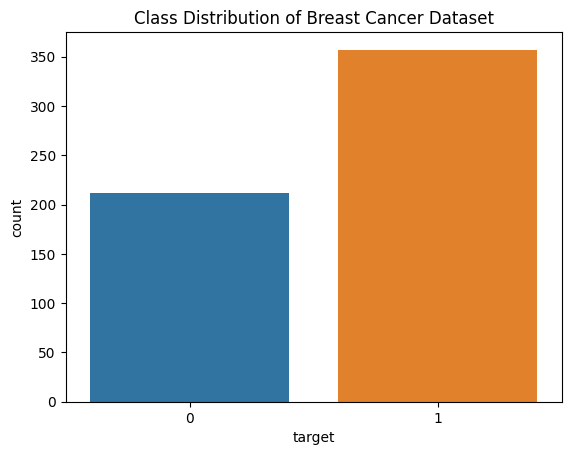

In [273]:
sns.countplot(x='target', data=breast_cancer_df)
plt.title('Class Distribution of Breast Cancer Dataset')
plt.show()


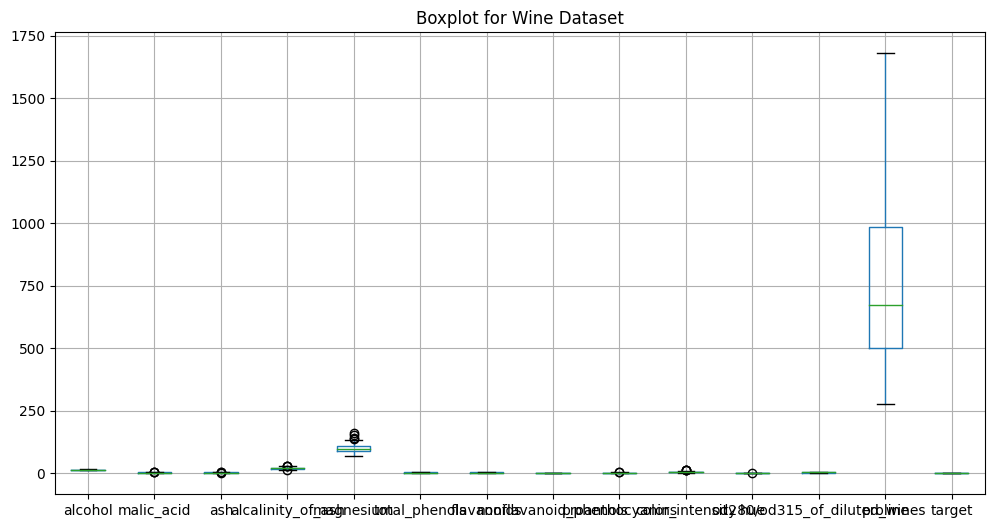

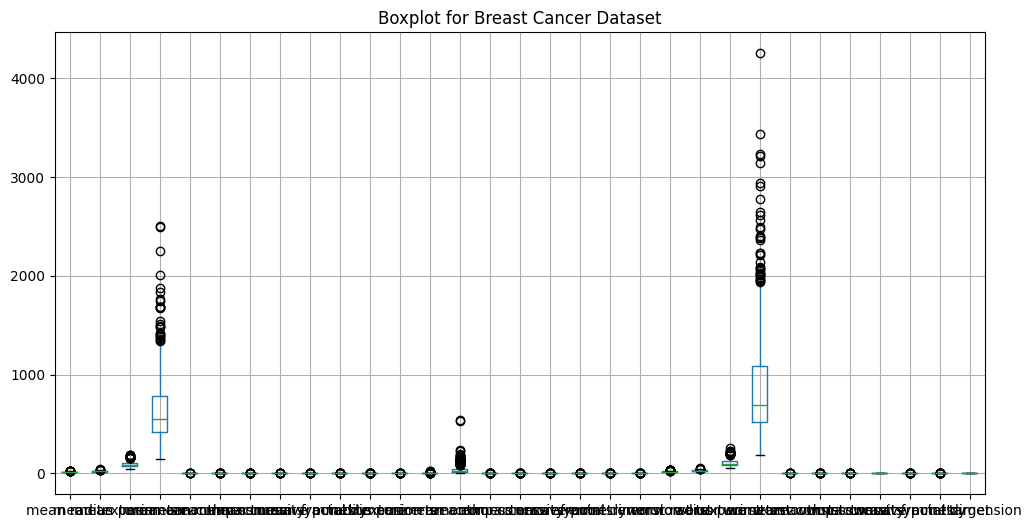

In [274]:
wine_df.boxplot(figsize=(12, 6))
plt.title('Boxplot for Wine Dataset')
plt.show()

breast_cancer_df.boxplot(figsize=(12, 6))
plt.title('Boxplot for Breast Cancer Dataset')
plt.show()


## Spliting the datasets 

In [275]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)
breast_cancer_X_train, breast_cancer_X_test, breast_cancer_y_train, breast_cancer_y_test = train_test_split(
    breast_cancer_X, breast_cancer_y, test_size=0.2, random_state=42)


# Implementing ID3 Algorithm

In [276]:
ID3_wine_model = DecisionTreeClassifier(criterion='entropy')
ID3_wine_model.fit(wine_X_train, wine_y_train)

ID3_breast_cancer_model = DecisionTreeClassifier(criterion='entropy')
ID3_breast_cancer_model.fit(breast_cancer_X_train, breast_cancer_y_train)


DecisionTreeClassifier(criterion='entropy')

In [277]:
wine_y_pred = ID3_wine_model.predict(wine_X_test)


In [278]:
print("ID3 Metrics -  wine model:")
print("Accuracy:", accuracy_score(wine_y_test, wine_y_pred))
print("Precision:", precision_score(wine_y_test, wine_y_pred, average='weighted'))
print("Recall:", recall_score(wine_y_test, wine_y_pred, average='weighted'))
print("F1 Score:", f1_score(wine_y_test, wine_y_pred, average='weighted'))

ID3 Metrics -  wine model:
Accuracy: 0.9166666666666666
Precision: 0.9254629629629628
Recall: 0.9166666666666666
F1 Score: 0.909382061106199


## CART Algorithm Implementation:

In [282]:
cart_wine_model = DecisionTreeClassifier(criterion = 'gini')
cart_wine_model.fit(wine_X_train, wine_y_train)



DecisionTreeClassifier()

In [283]:
cart_breast_cancer_model = DecisionTreeClassifier(criterion = 'gini')
cart_breast_cancer_model.fit(breast_cancer_X_train, breast_cancer_y_train)

DecisionTreeClassifier()

In [280]:
wine_y_pred1 = cart_wine_model.predict(wine_X_test)

In [281]:
print("CART Metrics- wine Model:")
print("Accuracy:", accuracy_score(wine_y_test, wine_y_pred1))
print("Precision:", precision_score(wine_y_test, wine_y_pred1, average='weighted'))
print("Recall:", recall_score(wine_y_test, wine_y_pred1, average='weighted'))
print("F1 Score:", f1_score(wine_y_test, wine_y_pred1, average='weighted'))

CART Metrics- wine Model:
Accuracy: 0.9444444444444444
Precision: 0.9462962962962962
Recall: 0.9444444444444444
F1 Score: 0.9439974457215836
